### Análisis de Verosimilitud y Máxima Verosimilitud con Distribuciones Normales

0.3989422804014327
0.02699548325659403
0.0029150244650281948
The L of of x for mu = 5 and sd = 3 is: 1.7698e-15
The L of of x for mu = 7 and sd = 3 is: 3.4470e-15
The LL of of x for mu = 5 and sd = 3 is: -33.9679
The LL of of x for mu = 7 and sd = 3 is: -33.3013
The max LL for sd 0.50 is -167.88


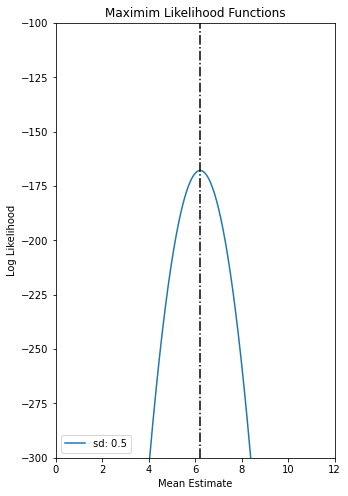

The max LL for sd 1.00 is -54.04


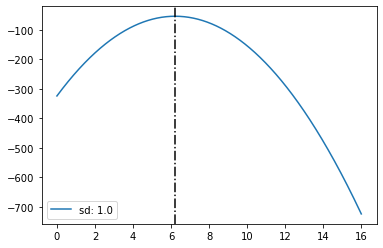

The max LL for sd 1.50 is -36.84


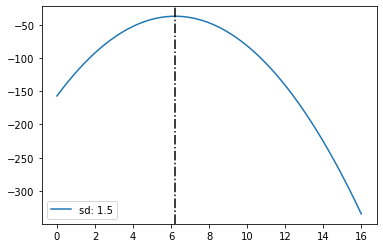

The max LL for sd 2.50 is -32.28


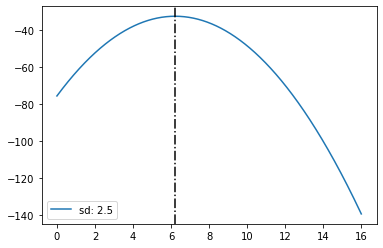

The max LL for sd 3.00 is -32.82


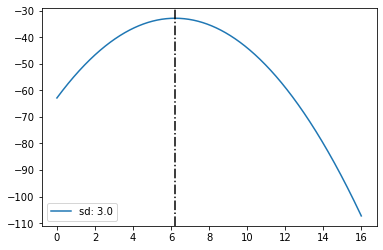

The max LL for sd 3.50 is -33.77


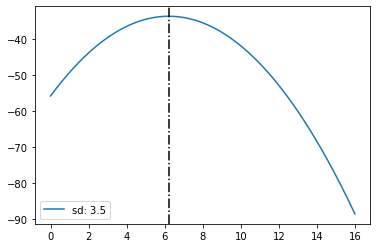

6.214285714285714
2.425418120907092


In [1]:

import math
import matplotlib.pyplot as plt
import numpy as np

from scipy.stats import norm

#Let’s say our sample is 3, what is the "probability" it comes from a distribution of μ = 3 and σ = 1?
print (norm.pdf(3, 3, 1))

#What if it came from a distribution with μ = 7 and σ = 2?
print (norm.pdf(3, 7, 2))

#So if we want to see the probability of 2 and 6 are drawn from a distribution with μ = 4 and σ = 1 we get:

print (norm.pdf(2, 4, 1)*norm.pdf(6, 4, 1))


# Consider this sample x and let’s compare these values the Likelihood for both PDF ~ N(5, 3) and PDF ~ N(7, 3).
x = [4, 5, 7, 8, 8, 9, 10, 5, 2, 3, 5, 4, 8, 9]

def compare_data_to_dist(x, mu_1=5, mu_2=7, sd_1=3, sd_2=3):
    l_1  = 1
    l_2  = 1
    ll_1 = 0
    ll_2 = 0

    for i in x:

     l_1  *= norm.pdf(i, mu_1, sd_1)
     l_2  *= norm.pdf(i, mu_2, sd_2)
     ll_1 += np.log(norm.pdf(i, mu_1, sd_1))
     ll_2 += np.log(norm.pdf(i, mu_2, sd_2))
    

    print ("The L of of x for mu = %d and sd = %d is: %.4e" % (mu_1, sd_1, l_1))
    print ("The L of of x for mu = %d and sd = %d is: %.4e" % (mu_2, sd_2, l_2))

    print ("The LL of of x for mu = %d and sd = %d is: %.4f" % (mu_1, sd_1, ll_1))
    print ("The LL of of x for mu = %d and sd = %d is: %.4f" % (mu_2, sd_2, ll_2))


compare_data_to_dist(x)


# Plot the Maximum Likelihood Functions for different values of mu and sigma
def plot_ll(x):
    plt.figure(figsize=(5,8))
    plt.title("Maximim Likelihood Functions")
    plt.xlabel("Mean Estimate")
    plt.ylabel("Log Likelihood")
    plt.ylim(-300, -100)
    plt.xlim(0, 12)
    mu_set = np.linspace(0, 16, 1000)
    sd_set = [0.5, 1, 1.5, 2.5, 3, 3.5]
    max_val = max_val_location = None
    for i in sd_set:
        ll_array = []
        
        for j in mu_set:
            temp_mm = 0
            
            for k in x:
                temp_mm += np.log(norm.pdf(k, j, i)) # The LL function
            ll_array.append(temp_mm)
        
            if (max_val is None):
                max_val = max(ll_array)
            elif max(ll_array) > max_val:
                max_val = max(ll_array)
                max_val_location = j
        
        print ("The max LL for sd %.2f is %.2f" % (i, max(ll_array)))    
        # Plot the results
        plt.plot(mu_set, ll_array, label="sd: %.1f" % i)
        plt.axvline(x=max_val_location, color='black', ls='-.')
        plt.legend(loc='lower left')
        plt.show()
        plt.close()


plot_ll(x);


#We can use the equations we derived from the first order derivatives above to get those estimates as well:
#θ_mu = Σ(x) / n = (2 + 3 + 4 + 5 + 7 + 8 + 9 + 10) / 8 = 6.214 
# Very close to our graph
#θ_sigma = Σ(x - θ_mu)^2 / n = Σ(x - 6.214)^2 / 8 = 2.425
# Also very close to our graph
# We can also verify these with the standard mean and std functions
# in numpy
print(np.mean(x))
print(np.std(x))



0.3989422804014327
0.02699548325659403
0.0029150244650281948
 Likelihood para μ = 5 y σ = 3 es: 1.7698e-15
 Likelihood para μ = 7 y σ = 3 es: 3.4470e-15
 log-Likelihood para μ = 5 y σ = 3 es: -33.9679
 log-Likelihood para μ = 7 y σ = 3 es: -33.3013
 máxima log-Likelihood para σ = 0.50 es -167.88
 máxima log-Likelihood para σ = 1.00 es -54.04
 máxima log-Likelihood para σ = 1.50 es -36.84
 máxima log-Likelihood para σ = 2.50 es -32.28
 máxima log-Likelihood para σ = 3.00 es -32.82
 máxima log-Likelihood para σ = 3.50 es -33.77


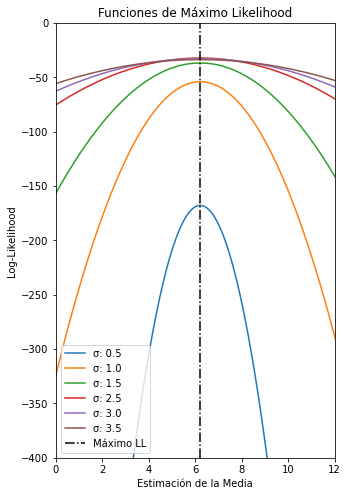

Media estimada: 6.214285714285714
Desviación estándar estimada: 2.425418120907092


In [9]:
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Vamos a calcular la "probabilidad" de que una muestra de 3 provenga de una distribución con μ = 3 y σ = 1
print(norm.pdf(3, 3, 1))

# ¿Qué pasa si la muestra de 3 proviene de una distribución con μ = 7 y σ = 2?
print(norm.pdf(3, 7, 2))

# ¿Cuál es la probabilidad de que 2 y 6 provengan de una distribución con μ = 4 y σ = 1?
print(norm.pdf(2, 4, 1) * norm.pdf(6, 4, 1))

# Considere esta muestra x, vamos a comparar la verosimilitud para las distribuciones PDF ~ N(5, 3) y PDF ~ N(7, 3)
x = [4, 5, 7, 8, 8, 9, 10, 5, 2, 3, 5, 4, 8, 9]

# Función para comparar la verosimilitud (Likelihood) de dos distribuciones con la muestra x
def compare_data_to_dist(x, mu_1=5, mu_2=7, sd_1=3, sd_2=3):
    l_1 = 1  # Likelihood acumulada para la primera distribución
    l_2 = 1  # Likelihood acumulada para la segunda distribución
    ll_1 = 0  # Log-Likelihood acumulada para la primera distribución
    ll_2 = 0  # Log-Likelihood acumulada para la segunda distribución

    for i in x:
        l_1 *= norm.pdf(i, mu_1, sd_1)
        l_2 *= norm.pdf(i, mu_2, sd_2)
        ll_1 += np.log(norm.pdf(i, mu_1, sd_1))
        ll_2 += np.log(norm.pdf(i, mu_2, sd_2))
    
    print(f" Likelihood para μ = {mu_1} y σ = {sd_1} es: {l_1:.4e}")
    print(f" Likelihood para μ = {mu_2} y σ = {sd_2} es: {l_2:.4e}")
    print(f" log-Likelihood para μ = {mu_1} y σ = {sd_1} es: {ll_1:.4f}")
    print(f" log-Likelihood para μ = {mu_2} y σ = {sd_2} es: {ll_2:.4f}")

compare_data_to_dist(x)

# Graficar las funciones de Log-Verosimilitud para diferentes valores de μ y σ
def plot_ll(x):
    plt.figure(figsize=(5, 8))
    plt.title("Funciones de Máximo Likelihood")
    plt.xlabel("Estimación de la Media")
    plt.ylabel("Log-Likelihood")
    plt.ylim(-400, 0)
    plt.xlim(0, 12)

    mu_set = np.linspace(0, 16, 1000)  # Conjunto de valores para μ
    sd_set = [0.5, 1, 1.5, 2.5, 3, 3.5]  # Conjunto de valores para σ
    max_val = max_val_location = None

    for i in sd_set:
        ll_array = []

        for j in mu_set:
            temp_ll = sum(np.log(norm.pdf(k, j, i)) for k in x)  # Log-Likelihood
            ll_array.append(temp_ll)
        
            if max_val is None or temp_ll > max_val:
                max_val = temp_ll
                max_val_location = j

        print(f" máxima log-Likelihood para σ = {i:.2f} es {max(ll_array):.2f}")
        plt.plot(mu_set, ll_array, label=f"σ: {i:.1f}")

    # Línea vertical indicando el valor de μ con la máxima log-Likelihood
    plt.axvline(x=max_val_location, color='black', ls='-.', label="Máximo LL")
    plt.legend(loc='lower left')
    plt.show()

plot_ll(x)

# Verificar los estimadores para la media (μ) y la desviación estándar (σ) usando las ecuaciones de derivadas
# Media estimada
print("Media estimada:", np.mean(x))

# Desviación estándar estimada
print("Desviación estándar estimada:", np.std(x))


### Ajuste de Curvas con Incertidumbre Mediante curve_fit 

[3.6875     3.26923077 7.8125    ]
[[ 6.64062505e-01  1.53394311e-08 -2.53906250e+00]
 [ 1.53394311e-08  3.84615393e+00  5.47836796e-08]
 [-2.53906250e+00  5.47836796e-08  2.44140624e+01]]
[0.8149003  1.96116137 4.94105883]


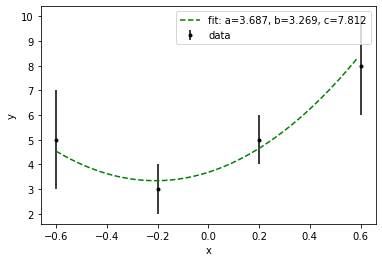

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as optimization

from scipy.optimize import curve_fit

# Generate artificial data = straight line with a=0 and b=1
# plus some noise.
#xdata = np.array([0.0,1.0,2.0,3.0,4.0,5.0])
#ydata = np.array([0.1,0.9,2.2,2.8,3.9,5.1])
#sigma = np.array([1.0,1.0,1.0,1.0,1.0,1.0])

def func(x, a, b, c):
    return a + b*x + c*x*x

#Frodesen example 10.2.5
xdata = np.array([-0.6,-0.2,0.2,0.6])
ydata = np.array([5,3,5,8])
sigma = np.array([2,1,1,2])

# Initial guess.
x0    = np.array([1.0, 2.0, 3.0])

xvals = np.arange(-0.6, 0.6, 0.01)

popt, pcov = curve_fit(func, xdata, ydata, x0, sigma,  method='lm',absolute_sigma=True)
perr = np.sqrt(np.diag(pcov))

print(popt)
print(pcov)
print(perr)

plt.errorbar(xdata, ydata, yerr=sigma, fmt='.k',label='data')
plt.plot(xvals, func(xvals, *popt), 'g--',label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
